In [1]:
# Import Data Manipulation from
import numpy as np
import pandas as pd     

# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter Data Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'Model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

In [2]:
# Load the dataset

url  = 'https://raw.githubusercontent.com/adnansayyedd/CementCompositeStrength_Predicition-Model/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
471,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28,57.03
778,295.0,0.0,0.0,185.0,0.0,1069.0,769.0,7,14.80
483,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,55.25
609,236.0,0.0,0.0,193.0,0.0,968.0,885.0,180,24.10
416,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,3,15.61
...,...,...,...,...,...,...,...,...,...
973,143.8,136.3,106.2,178.1,7.5,941.5,774.3,28,26.15
467,250.0,0.0,95.7,191.8,5.3,948.9,857.2,100,41.16
37,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90,37.72
349,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,3,17.37


In [3]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict ({
        'feature': i,
        'unique_values': df[i].nunique(),
        'Missing_values': df[i].isnull().sum(),
        'Min': df[i].min(),
        '25%': df[i].quantile(0.25),
        'Median': df[i].median(),
        'Max': df[i].max(), 
        'Mean': df[i].mean(),
        'mode' : df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),

        })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['unique_values', 'Missing_values', 'Min', '25%', 'Median', 'Max', 'Mean', 'mode', 'Standard Deviation', 'Variance', 'Skewness','Kurtosis','IQR'], cmap='coolwarm')

,feature,unique_values,Missing_values,Min,25%,Median,Max,Mean,mode,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,278,0,102.000000,192.375000,272.900000,540.000000,281.167864,362.600000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,185,0,0.000000,0.000000,22.000000,359.400000,73.895825,0.000000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,156,0,0.000000,0.000000,0.000000,200.100000,54.188350,0.000000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,195,0,121.800000,164.900000,185.000000,247.000000,181.567282,192.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,111,0,0.000000,0.000000,6.400000,32.200000,6.204660,0.000000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,284,0,801.000000,932.000000,968.000000,1145.000000,972.918932,932.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,302,0,594.000000,730.950000,779.500000,992.600000,773.580485,594.000000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,14,0,1.000000,7.000000,28.000000,365.000000,45.662136,28.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,845,0,2.330000,23.710000,34.445000,82.600000,35.817961,33.400000,16.705742,279.081814,0.416977,-0.313725,22.425000


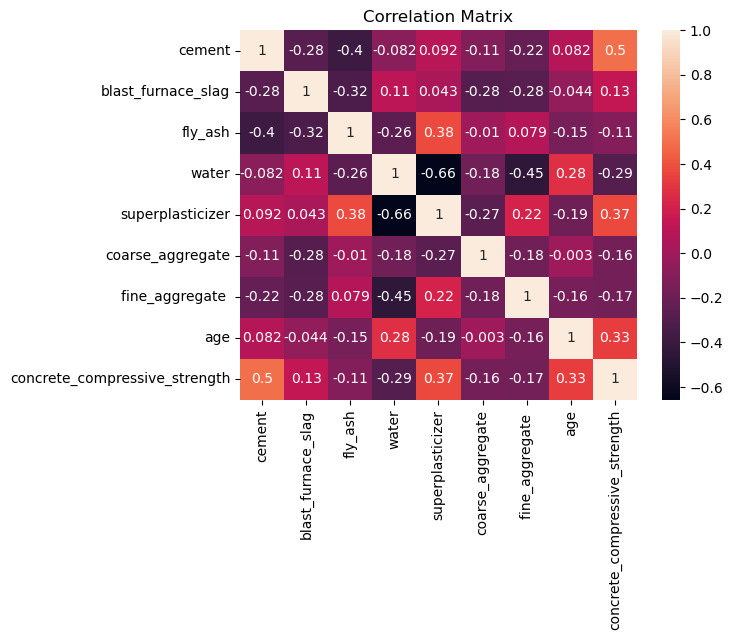

In [4]:
# Checking Correlation matrix
# X = Independent Variables
# y = Dependent Variable ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [28]:
df['composite_Ratio'] = (df['cement'] + df['superplasticizer'] + df['blast_furnace_slag'])/( df['water'] )


In [29]:
df


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,cement_to_water_ratio,composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.458333,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.458333,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.034375,1.723958
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1.538976,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.643878,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.770628,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.906036,2.033599


In [14]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
composite_Ratio                  0.570094
Name: concrete_compressive_strength, dtype: float64

In [13]:
df


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.451331
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.445768
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.409483
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.409483
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.282809
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.382300
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.328040
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.270943
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.306471


In [30]:
df['cement_to_water_ratio'] = df['cement'] / df['water']

In [31]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,cement_to_water_ratio,composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.458333,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.458333,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.034375,1.723958
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1.538976,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.643878,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.770628,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.906036,2.033599


In [32]:
df.corr()['concrete_compressive_strength'] 

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
cement_to_water_ratio            0.559522
composite_Ratio                  0.620196
Name: concrete_compressive_strength, dtype: float64

In [33]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,cement_to_water_ratio,composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.458333,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.458333,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.034375,1.723958
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1.538976,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,1.643878,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.770628,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.906036,2.033599


In [34]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
cement_to_water_ratio            0.559522
composite_Ratio                  0.620196
Name: concrete_compressive_strength, dtype: float64

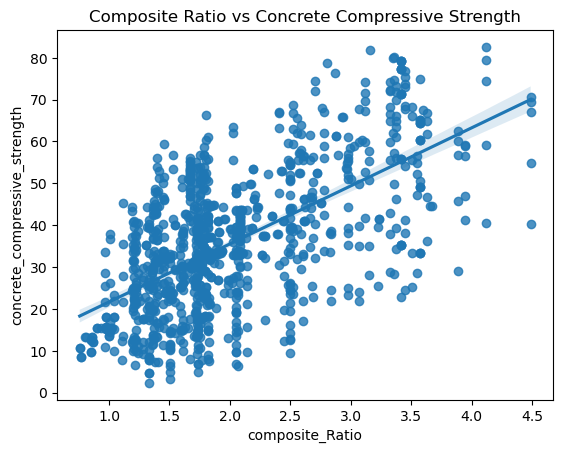

In [40]:
sns.regplot(x = df['composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

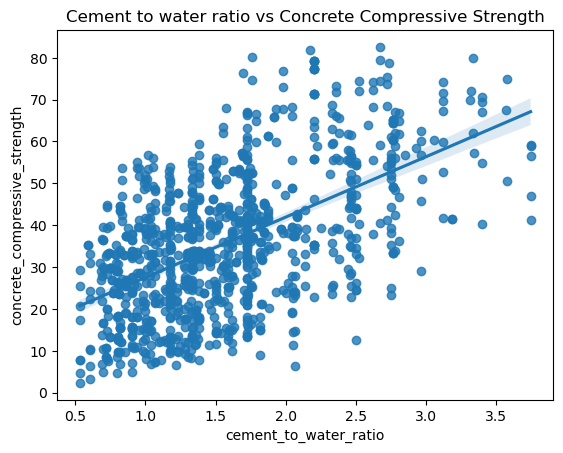

In [42]:
sns.regplot(x = df['cement_to_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement to water ratio vs Concrete Compressive Strength')
plt.show()

## step 4 : 
split the data into training and test sets
also
using Train and Test to prevent data leakage

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop (columns='concrete_compressive_strength', axis = 1)

In [49]:
X


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,cement_to_water_ratio,composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,3.333333,3.348765
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,3.333333,3.348765
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1.458333,2.083333
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,1.458333,2.083333
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1.034375,1.723958
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,1.538976,2.234410
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,1.643878,1.696939
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0.770628,1.525688
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0.906036,2.033599


In [56]:

X = df.drop (columns='concrete_compressive_strength', axis = 1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# using Scaling Technique 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR



0.5941935306287764